# Linear regression

### Let's define the function!

\\( y = 5x + 3 \\)

In [34]:
%matplotlib inline

import numpy as np

# Noise mean and standart deviation
mu, sigma = 0, 20

# Range of input values
range_min = -50
range_max = 50

# Number of examples to use for training
samples = 10

# The "ground-truth" function 
f = lambda x: 5*x + 3

# Input values
x = np.random.uniform(range_min,  range_max, samples)

# Output values with added noise
y = f(x) + np.random.normal(mu, sigma, samples)

for in_out in zip(x,y):
    print("X :{0:.2f}\tY:{1:.2f}".format(in_out[0], in_out[1]))

X :11.30	Y:85.01
X :10.36	Y:88.70
X :-24.26	Y:-92.07
X :33.90	Y:159.59
X :19.59	Y:86.40
X :47.74	Y:213.11
X :-18.54	Y:-82.55
X :40.64	Y:186.64
X :44.18	Y:208.93
X :11.64	Y:79.74


---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [35]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Train for 300 epochs

In [38]:
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam ,loss='mse')
model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
10/10 [==============================] - 0s 26ms/step - loss: 1780.1464
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 1761.5533
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 1743.1124
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 1724.8959
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 1706.9336
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 1689.2157
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 1671.7259
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 1654.4475
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 1637.3699
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 1620.4835
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 1603.7805
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 1587.2554


10/10 [==============================] - 0s 2ms/step - loss: 660.8464
Epoch 100/300
10/10 [==============================] - 0s 2ms/step - loss: 654.8611
Epoch 101/300
10/10 [==============================] - 0s 2ms/step - loss: 648.9580
Epoch 102/300
10/10 [==============================] - 0s 2ms/step - loss: 643.1363
Epoch 103/300
10/10 [==============================] - 0s 2ms/step - loss: 637.3954
Epoch 104/300
10/10 [==============================] - 0s 2ms/step - loss: 631.7341
Epoch 105/300
10/10 [==============================] - 0s 2ms/step - loss: 626.1532
Epoch 106/300
10/10 [==============================] - 0s 2ms/step - loss: 620.6508
Epoch 107/300
10/10 [==============================] - 0s 2ms/step - loss: 615.2265
Epoch 108/300
10/10 [==============================] - 0s 2ms/step - loss: 609.8791
Epoch 109/300
10/10 [==============================] - 0s 2ms/step - loss: 604.6078
Epoch 110/300
10/10 [==============================] - 0s 2ms/step - loss: 599.4119
Epoch 

10/10 [==============================] - 0s 2ms/step - loss: 363.2643
Epoch 197/300
10/10 [==============================] - 0s 2ms/step - loss: 362.2067
Epoch 198/300
10/10 [==============================] - 0s 2ms/step - loss: 361.1727
Epoch 199/300
10/10 [==============================] - 0s 2ms/step - loss: 360.1617
Epoch 200/300
10/10 [==============================] - 0s 2ms/step - loss: 359.1736
Epoch 201/300
10/10 [==============================] - 0s 2ms/step - loss: 358.2077
Epoch 202/300
10/10 [==============================] - 0s 2ms/step - loss: 357.2638
Epoch 203/300
10/10 [==============================] - 0s 2ms/step - loss: 356.3412
Epoch 204/300
10/10 [==============================] - 0s 2ms/step - loss: 355.4396
Epoch 205/300
10/10 [==============================] - 0s 2ms/step - loss: 354.5588
Epoch 206/300
10/10 [==============================] - 0s 2ms/step - loss: 353.6981
Epoch 207/300
10/10 [==============================] - 0s 2ms/step - loss: 352.8573
Epoch 

10/10 [==============================] - 0s 2ms/step - loss: 322.6254
Epoch 294/300
10/10 [==============================] - 0s 2ms/step - loss: 322.5066
Epoch 295/300
10/10 [==============================] - 0s 2ms/step - loss: 322.3895
Epoch 296/300
10/10 [==============================] - 0s 2ms/step - loss: 322.2741
Epoch 297/300
10/10 [==============================] - 0s 2ms/step - loss: 322.1603
Epoch 298/300
10/10 [==============================] - 0s 2ms/step - loss: 322.0482
Epoch 299/300
10/10 [==============================] - 0s 2ms/step - loss: 321.9375
Epoch 300/300
10/10 [==============================] - 0s 2ms/step - loss: 321.8283


---------------------------------------------------------------------------------

### Print trained weight and bias

In [39]:
weight, bias = model.layers[1].get_weights()
print("Scalar: ", weight[0,0])
print("Bias  : ", bias[0])

Scalar:  4.564796
Bias  :  3.598625


-----------------------------------------------------------------------------------------------------------------------------

### Plot original and predicted line

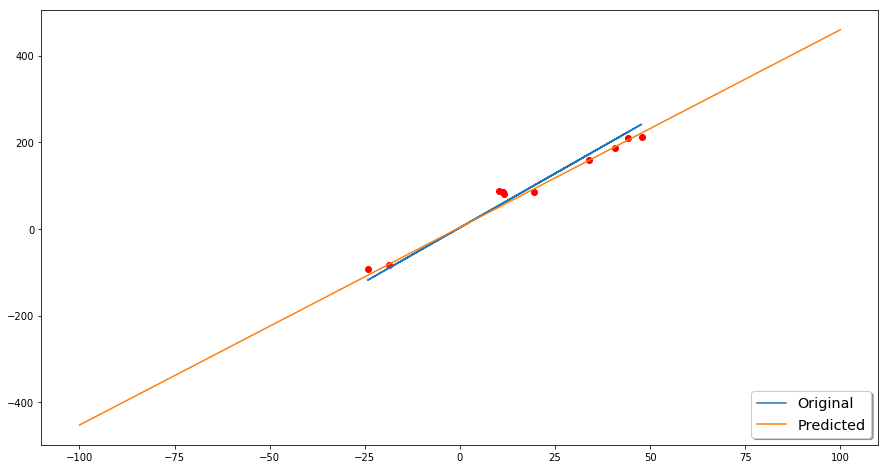

In [40]:
test_input = np.linspace(range_min*2, range_max*2)
predictions = model.predict(test_input)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(x,y, c='r')
plt.plot(x, f(x), label='Original')
plt.plot(test_input, predictions, label='Predicted')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')

'''
sub_axes = plt.axes([.2, .6, .25, .25])
sub_axes.plot(x[0:3], y[0:3])
sub_axes.plot(x[0:3], predictions[0:3])
'''
plt.show()
